# Universidad de Buenos Aires
# Aprendizaje Profundo - TP1
# Cohorte 20 - 3er bimestre 2025


Este primer TP comienza la semana de la clase 2 y la ventana de entrega estará abierta hasta las **23hs del jueves 31 de julio (hora de Argentina)**. La resolución del TP es **individual**. Pueden utilizar los contenidos vistos en clase y otra bibliografía. Si se toman ideas de fuentes externas deben ser correctamente citadas incluyendo el correspondiente link o página de libro.

ESTE TP1 EQUIVALE AL 60% DE SU NOTA FINAL.

El formato de entrega debe ser un link a un notebook de google colab. Permitir acceso a gvilcamiza.ext@fi.uba.ar y **habilitar los comentarios, para poder darles el feedback**. Si no lo hacen así no se podrá dar el feedback respectivo por cada pregunta.

El envío **se realizará en el siguiente link de google forms: [link](https://forms.gle/2UKBgNLjBZZ5XCeH9)**. Tanto los resultados, gráficas, como el código y las explicaciones deben quedar guardados y visualizables en el colab.

**NO SE VALIDARÁN ENVÍOS POR CORREO, EL MÉTODO DE ENTREGA ES SOLO POR EL FORMS.**

**Consideraciones a tener en cuenta:**
- Se entregará 1 solo colab para este TP1.
- Renombrar el archivo de la siguiente manera: **APELLIDO-NOMBRE-DL-TP1-Co20.ipynb**
- Los códigos deben poder ejecutarse.
- Los resultados, cómo el código, los gráficos y las explicaciones deben quedar guardados y visualizables en el correspondiente notebook.
- Prestar atención a las consignas, responder las preguntas cuando corresponda.

In [32]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import gdown
import os
import pandas as pd

# **PREGUNTA 1**

## **Comparación de Gradiente Descendente y Adam en una Función de Costo No Convexa**

En este ejercicio se compararán los optimizadores Gradiente Descendente (GD) y Adam en la minimización de una función de costo basada en una red neuronal de una sola neurona:
$$
z = w x + b
$$
Con función de activación tangente hiperbólica:

$$
\hat{y} = \tanh(z) = \tanh(w x + b)
$$

\\

Se analizará la trayectoria de aprendizaje de ambos algoritmos y se evaluará su eficiencia con diferentes tasas de aprendizaje (learning rate).

\\

La función de costo utilizada es el Error Cuadrático Medio (MSE):

$$
J(w, b) = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}_i - y_i)^2
$$

$$
J(w, b) = \frac{1}{m} \sum_{i=1}^{m} ( \tanh(w x_i + b) - y_i )^2
$$

donde \\( w \\) y \\( b \\) son los parámetros a optimizar.

\\

Si bien es cierto, en estos experimentos estamos comparando optimizadores (GD vs Adam), y no entrenando un modelo como tal, de igual forma se necesitará una especie de dataset. Este será sintético y solo de prueba, por ende tendrán cierta libertad para elegir sus valores. Sin embargo deberán tomar en cuenta que cumpla la siguiente estructura:

`x = np.linspace(ini, fin, n)`

donde `x` es un array de una sola dimensión y con `n` cantidad de valores. Y tiene un rango de valores desde `ini` hasta `fin`. Recomiendo que sean los mismo valores solo que con el signo cambiado, por ejemplo `ini=-3 , fin=3`.

\\

Y con un target `y`:

`y = funcion_no_lineal(x) + ruido`

donde `y` es también un vector de una sola dimensión de tamaño `n` que sigue un patrón no lineal con respecto a `x` adicionando un ruido que puede ser creado con algunas de las funciones del paquete `np.random`.


### 1a) Implementación del Gradiente Descendente (1 punto)
- Implementar el algoritmo del Gradiente Descendente (GD) para minimizar \\( J(w, b) \\).
- Utilizar 100 épocas y 3 diferentes learning rates `(0.1, 0.01, 0.001)`.
- Inicializar valores de \\( w \\) y \\( b \\) de manera aleatoria con `np.random.randn()` para cada learning rate.
- Graficar la función de Costo \\( J(w, b) \\) VS número de época

\\

El optimizador del Gradiente Descendente se debe implementar haciendo el código desde cero y paso a paso. Se pueden usar librerías como `numpy`, `scipy`, `matplotlib` o similares. Pero no está permitido usar Pytorch ni TensorFlow o frameworks que ya contengan el optimizador desarrollado.

In [14]:
ini = -3
fin = 3
n = 10000

x = np.linspace(ini, fin, n)

y = np.sin(x) + np.random.normal(0, 0.1, n)

In [15]:
learning_rates = [0.1, 0.01, 0.001]

In [16]:
def mse_cost(y_hat, y, m=len(y)):
    return (1/m) * np.sum((y_hat - y)**2)

In [17]:
def gradient_descent_tanh(x, y, lr=0.01, epochs=100):
    m = len(x)

    # Defino w y b aleatoriamente
    np.random.seed(42)  # Defino semilla para reproducibilidad en toda la notebook
    w = np.random.randn()
    b = np.random.randn()

    print(f"Initial parameters: w={w}, b={b}")
    
    cost_history = []
    trajectory = [(w, b)] 

    for epoch in range(epochs):
        z = w * x + b

        # Funcion de activacion tanh
        y_hat = np.tanh(z)
        error = y_hat - y

        # Derivada de tanh(z)
        dz = (1 - np.tanh(z)**2) 
        dw = (2/m) * np.sum(error * dz * x)
        db = (2/m) * np.sum(error * dz)

        w -= lr * dw
        b -= lr * db

        # Funcion de costo (MSE)
        cost = mse_cost(y_hat, y, m)
        cost_history.append(cost)
        trajectory.append((w, b))

    return w, b, cost_history, trajectory

In [18]:
GD_results = {}
GD_trajectory = {}

for lr in learning_rates:
    _, _, cost, trajectory = gradient_descent_tanh(x, y, lr=lr, epochs=100)
    GD_results[lr] = cost
    GD_trajectory[lr] = trajectory

Initial parameters: w=0.4967141530112327, b=-0.13826430117118466
Initial parameters: w=0.4967141530112327, b=-0.13826430117118466
Initial parameters: w=0.4967141530112327, b=-0.13826430117118466


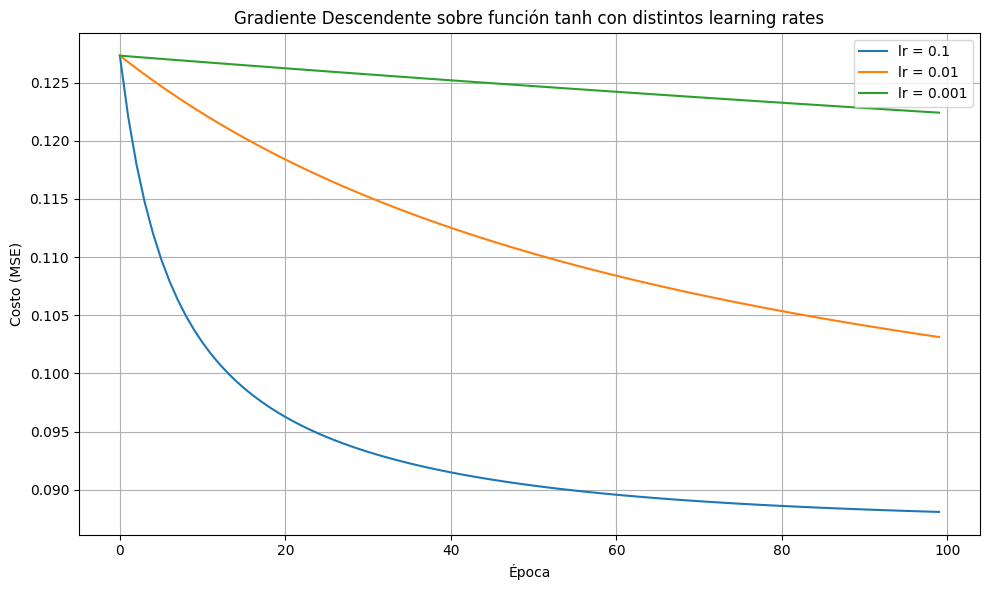

In [19]:
# Graficar
plt.figure(figsize=(10, 6))
for lr, cost in GD_results.items():
    plt.plot(cost, label=f'lr = {lr}')
plt.xlabel('Época')
plt.ylabel('Costo (MSE)')
plt.title('Gradiente Descendente sobre función tanh con distintos learning rates')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

A medida que se reduce el learning rate le cuesta mucho más converger. El lr en 0.1 reduce rapidamente el error en las primeras épocas y logra una buena convergencia. En cambio, al achivar el lr las curvas comienzan a descender muy lentamente o casi no descienden como es el caso de lr en 0.001.

### 1b) Implementación de Adam (1 punto)  
- Implementar el algoritmo de Adam para minimizar \\( J(w, b) \\).  
- Utilizar 100 épocas y 3 diferentes learning rates `(0.1, 0.01, 0.001)`.
- Utilizar los mismos valores de \\( w \\) y \\( b \\) que se usaron para GD para cada diferente learning rate.
- Graficar la función de Costo \\( J(w, b) \\) VS número de época
- Hacer 2 modelos, uno sin mini-batch y otro con mini-batch.

\\

Al igual que para GD, el optimizador Adam también se debe implementar desde cero y paso a paso. Se pueden usar librerías como `numpy`, `scipy`, `matplotlib` o similares. Pero no está permitido usar Pytorch ni TensorFlow o frameworks que ya contengan el optimizador desarrollado.

In [20]:
def adam_optimizer(x, y, lr=0.01, epochs=100, beta1=0.9, beta2=0.999, epsilon=1e-8, w_init=None, b_init=None):
    m = len(x)
    
    np.random.seed(42)  # Defino semilla para reproducibilidad en toda la notebook
    w = np.random.randn() if w_init is None else w_init
    b = np.random.randn() if b_init is None else b_init

    print(f"Initial parameters: w={w}, b={b}")

    mw, mb = 0, 0  # Momentos del gradiente
    vw, vb = 0, 0  # Momentos del gradiente al cuadrado
    cost_history = []
    trajectory = [(w, b)]

    for t in range(1, epochs + 1):
        z = w * x + b
        y_hat = np.tanh(z)
        error = y_hat - y
        dz = (1 - np.tanh(z) ** 2)

        dw = (2/m) * np.sum(error * dz * x)
        db = (2/m) * np.sum(error * dz)

        # Actualización de momentos
        mw = beta1 * mw + (1 - beta1) * dw
        mb = beta1 * mb + (1 - beta1) * db

        vw = beta2 * vw + (1 - beta2) * (dw ** 2)
        vb = beta2 * vb + (1 - beta2) * (db ** 2)

        # Corrección de sesgo
        mw_hat = mw / (1 - beta1 ** t)
        mb_hat = mb / (1 - beta1 ** t)

        vw_hat = vw / (1 - beta2 ** t)
        vb_hat = vb / (1 - beta2 ** t)

        # Actualización de parámetros
        w -= lr * mw_hat / (np.sqrt(vw_hat) + epsilon)
        b -= lr * mb_hat / (np.sqrt(vb_hat) + epsilon)

        cost = mse_cost(y_hat, y, m)
        cost_history.append(cost)
        trajectory.append((w, b))

    return w, b, cost_history, trajectory

In [21]:
adam_results = {}
adam_trajectory = {}

for lr in learning_rates:
    w, b, cost, trajectory = adam_optimizer(x, y, lr=lr, epochs=100)
    adam_results[lr] = cost
    adam_trajectory[lr] = trajectory

Initial parameters: w=0.4967141530112327, b=-0.13826430117118466
Initial parameters: w=0.4967141530112327, b=-0.13826430117118466
Initial parameters: w=0.4967141530112327, b=-0.13826430117118466


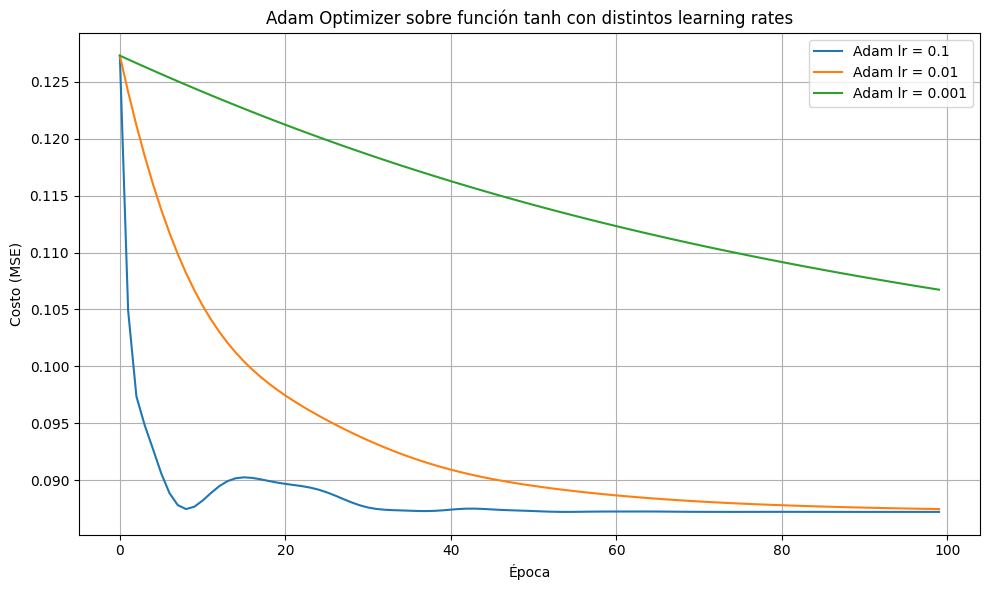

In [22]:
# Graficar comparativa
plt.figure(figsize=(10, 6))
for lr, cost in adam_results.items():
    plt.plot(cost, label=f'Adam lr = {lr}')
plt.xlabel('Época')
plt.ylabel('Costo (MSE)')
plt.title('Adam Optimizer sobre función tanh con distintos learning rates')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Con Adam, todos los learning rates logran una reducción efectiva del error, pero lr = 0.01 ofrece el mejor equilibrio entre velocidad de convergencia y estabilidad. En cambio, lr = 0.1 converge más rápido pero con oscilaciones, y lr = 0.001 es estable pero más lento en alcanzar el mínimo.

In [27]:
def adam_optimizer_minibatch(x, y, lr=0.01, epochs=100, batch_size=32, beta1=0.9, beta2=0.999, epsilon=1e-8, w_init=None, b_init=None):
    m = len(x)
    
    np.random.seed(42)  # Defino semilla para reproducibilidad en toda la notebook
    w = np.random.randn() if w_init is None else w_init
    b = np.random.randn() if b_init is None else b_init

    print(f"Initial parameters: w={w}, b={b}")

    mw, mb = 0, 0
    vw, vb = 0, 0
    cost_history = []
    trajectory = [(w, b)]

    # Calcular y guardar el costo inicial antes de la primera época
    z_init = w * x + b
    y_hat_init = np.tanh(z_init)
    cost_init = (1/m) * np.sum((y_hat_init - y) ** 2)
    cost_history = [cost_init]


    for t in range(1, epochs + 1):
        indices = np.random.permutation(m)
        x_shuffled = x[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            x_batch = x_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]
            mb_size = len(x_batch)

            z = w * x_batch + b
            y_hat = np.tanh(z)
            error = y_hat - y_batch
            dz = (1 - np.tanh(z)**2)

            dw = (2/mb_size) * np.sum(error * dz * x_batch)
            db = (2/mb_size) * np.sum(error * dz)

            mw = beta1 * mw + (1 - beta1) * dw
            mb = beta1 * mb + (1 - beta1) * db
            vw = beta2 * vw + (1 - beta2) * dw**2
            vb = beta2 * vb + (1 - beta2) * db**2

            mw_hat = mw / (1 - beta1**t)
            mb_hat = mb / (1 - beta1**t)
            vw_hat = vw / (1 - beta2**t)
            vb_hat = vb / (1 - beta2**t)

            w -= lr * mw_hat / (np.sqrt(vw_hat) + epsilon)
            b -= lr * mb_hat / (np.sqrt(vb_hat) + epsilon)

        # Evaluar costo en todos los datos tras cada época
        z_full = w * x + b
        y_hat_full = np.tanh(z_full)
        cost = mse_cost(y_hat_full, y, m)
        cost_history.append(cost)
        trajectory.append((w, b))

    return w, b, cost_history, trajectory

In [28]:
adam_minibatch_results = {}
adam_minibatch_trajectory = {}
for lr in learning_rates:
    w, b, cost, trajectory = adam_optimizer_minibatch(x, y, lr=lr, epochs=100, batch_size=32)
    adam_minibatch_results[lr] = cost
    adam_minibatch_trajectory[lr] = trajectory

Initial parameters: w=0.4967141530112327, b=-0.13826430117118466
Initial parameters: w=0.4967141530112327, b=-0.13826430117118466
Initial parameters: w=0.4967141530112327, b=-0.13826430117118466


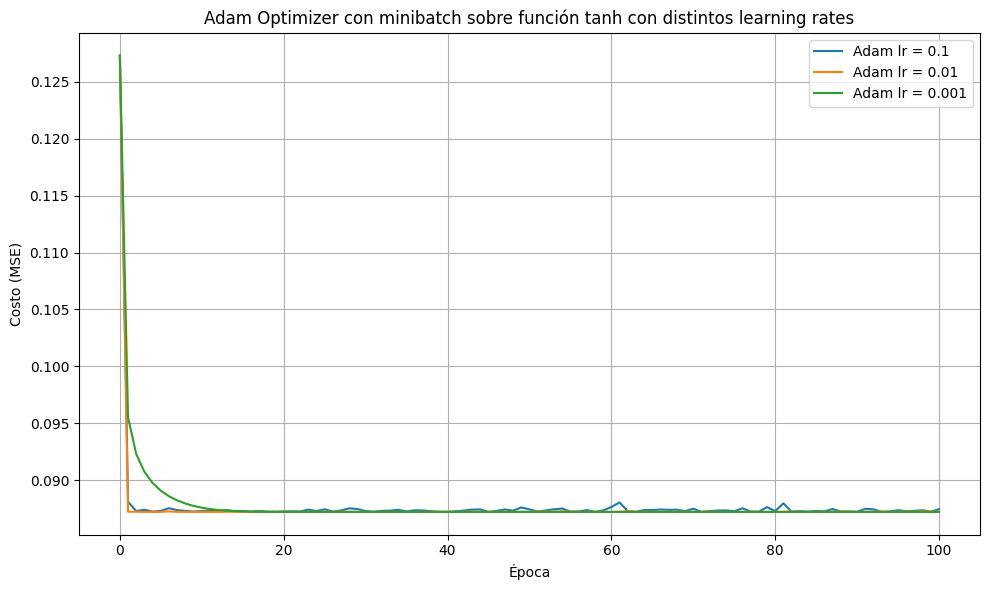

In [29]:
# Graficar comparativa
plt.figure(figsize=(10, 6))
for lr, cost in adam_minibatch_results.items():
    plt.plot(cost, label=f'Adam lr = {lr}')
plt.xlabel('Época')
plt.ylabel('Costo (MSE)')
plt.title('Adam Optimizer con minibatch sobre función tanh con distintos learning rates')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Con Adam y mini-batch, los tres learning rates convergen rápidamente al mismo mínimo, pero lr = 0.01 y lr = 0.001 lo hacen de forma más suave y estable. En cambio, lr = 0.1 muestra oscilaciones leves, típicas del entrenamiento por lotes con tasa alta.

### 1c) Comparativa de optimizadores (0.5 puntos)  
- Comparar el resultado y rendimiento de GD VS Adam (sin mini-batch) VS Adam (con mini-batch) para cada uno de los learning rates.
- Redactar conclusiones analíticas que resalten las diferencias entre cada optimizador.

Learning Rate en 0.1:

- **GD**: converge rápido al principio y luego estabiliza temprano con un error un poco mayor a Adam.
- **Adam**:  desciende bruscamente y alcanza el mínimo más bajo, aunque con oscilaciones marcadas por el alto lr.
- **Adam con mini-batch**: converge igual de rápido, pero muestra oscilaciones debido al ruido de los lotes pequeños.

Learning Rate en 0.01:

- **GD**: mejora progresiva y estable, pero a un ritmo más lento.
- **Adam**: rápida convergencia, sin oscilaciones, y alcanza el mejor error final.
- **Adam con mini-batch**: converge desde el primer momento y se estabiliza temprano con el mejor error alcanzado en el experimento.

Learning Rate en 0.001:

- **GD**: converge muy lentamente, casi plano.
- **Adam**: mejora constante aunque lenta, pero finalmente reduce el MSE mucho más que GD.
- **Adam con mini-batch**: converge rápido manteniendo estabilidad.

### 1d) Visualización en 3D de la trayectoria de aprendizaje (0.5 puntos)
- Graficar en 3D la trayectoria del aprendizaje de los 3 optimizadores sobre la superficie de la función de costo \\( J(w, b) \\). Se debe elegir un solo learning rate.
- Comparar y redactar cómo se mueven en el espacio de parámetros y qué diferencias existen en la convergencia.
- Recomiendo utilizar `mpl_toolkits.mplot3d` y `np.meshgrid`, pero queda a su criterio la elección de funciones a usar para lograr el gráfico.

In [48]:
# Mallado mejor aproximación lineal
X1 = np.linspace(0, 1.5, 100)
X2 = np.linspace(-0.5, 0.5, 100)
X1, X2 = np.meshgrid(X1, X2)

In [49]:
# Cálculo de la superficie J(w, b)
def calcular_cost_surface(W, B, x, y):
    Z = np.tanh(W[np.newaxis, :, :] * x[:, np.newaxis, np.newaxis] + B[np.newaxis, :, :])
    mse = np.mean((Z - y[:, np.newaxis, np.newaxis])**2, axis=0)
    return mse


J = calcular_cost_surface(X1, X2, x, y)

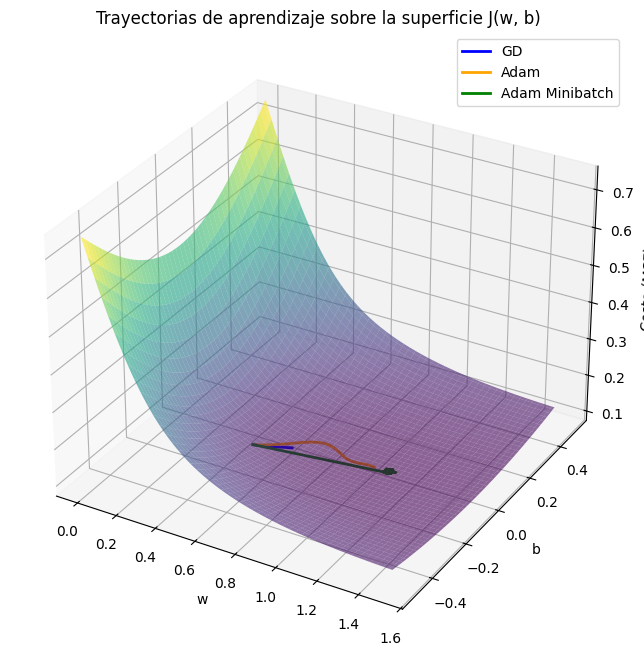

In [50]:
# Gráfico 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Superficie de la función de costo
ax.plot_surface(X1, X2, J, cmap='viridis', alpha=0.6, edgecolor='none')

# Función para graficar cada trayectoria
def plot_traj(ax, traj, label, color):
    traj = np.array(traj)
    w_path, b_path = traj[:, 0], traj[:, 1]
    Z_path = np.tanh(np.outer(w_path, x) + b_path[:, None])
    cost_path = np.mean((Z_path - y)**2, axis=1)
    ax.plot(w_path, b_path, cost_path, label=label, color=color, linewidth=2)

# Dibujar trayectorias
plot_traj(ax, GD_trajectory[0.01], 'GD', 'blue')
plot_traj(ax, adam_trajectory[0.01], 'Adam', 'orange')
plot_traj(ax, adam_minibatch_trajectory[0.01], 'Adam Minibatch', 'green')

# Etiquetas
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Costo (MSE)')
ax.set_title('Trayectorias de aprendizaje sobre la superficie J(w, b)')
ax.legend()
plt.show()

Se observa que Adam y Adam con minibatch convergen más rápidamente hacia el mínimo en comparación con Gradiente Descendente, que sigue una trayectoria más lenta y menos directa. Además, Adam con minibatch alcanza una trayectoria más suave y estable, beneficiándose de la aleatorización de los batches. Esta visualización refuerza la eficiencia y precisión del optimizador Adam, especialmente cuando se combina con entrenamiento en minibatches.

# **PREGUNTA 2**

Descargar el dataset del siguiente link: https://drive.google.com/file/d/147YyKAiQhJhZV9tHAkrgcTzvRgmwB-OX/view?usp=sharing.

El dataset consiste en compras de productos que diferentes clientes realizaron durante un black sales. El dataset contiene información sobre las transacciones, compuestas por un cliente y el producto que adquirió.


In [44]:
output_path = ""

# Función para descargar un archivo solo si no existe
def descargar_si_no_existe(url_id, output_path):
    if not os.path.exists(output_path):
        gdown.download(url + url_id, output_path, quiet=False)

url = 'https://drive.google.com/uc?id='

### Archivos Utiles:
descargar_si_no_existe('147YyKAiQhJhZV9tHAkrgcTzvRgmwB-OX', 'dataset_compras.csv')


Downloading...
From: https://drive.google.com/uc?id=147YyKAiQhJhZV9tHAkrgcTzvRgmwB-OX
To: /Users/anoguera/Documents/GitHub/TP1-AP/dataset_compras.csv
100%|██████████| 8.41M/8.41M [00:00<00:00, 41.6MB/s]


In [46]:
df = pd.read_csv('dataset_compras.csv')

### 2a) EDA y preparación del dataset (2.5 puntos)
Realizar el análisis exploratorio del dataset (EDA) con las herramientas vistas en materias anteriores. Pre-procesar y transformar las variables que sean necesarias, analizar qué columnas se deben dropear, cuáles vale la pena hacer un tratamiento de valores nulos, si se debe usar label encoding, one-hot encoding o mapping encoding, explicar los criterios utilizados y analizar las distribuciones.

Vamos a tratar este problema como una clasificación donde queremos averiguar si el cliente pertenece a un segmento: "Casual" (gasta menos de 3000), "Gama media" (gasta entre 3000 y 8000), "Gama alta" (gasta entre 8000 y 18000) o a "Premium" (gasta más de 18000), según el producto que adquirió.

Redactar las conclusiones preliminares que pueden notar de las columnas y justificar el porqué de cada encoding aplicado.

**IMPORTANTE: Luego de asignar los segmentos, no se olviden de eliminar la columna "Purchase".**

### 2b) Modelo de deep leaning sin embeddings (1.5 puntos)
Entrenar un modelo de deep learning usando Pytorch que no utilice embeddings, **descartando el `product_id` y `user_id`**. Graficar las evoluciones por época de la función de costo y de métricas como el accuracy y el f1 score para train y validation. Mostrar una matriz de confusión absoluta y otra normalizada por fila. Explicar el proceso de iteracion utilizado para conseguir los resultados y justificar los resultados obtenidos.

Pueden usarse herramientas de regularización y prueba de hiperpametros para conseguir mejores resultados.

Un resultado aceptable sería al menos un 77% de accuracy y f1 score para el set de validation.

### 2c) Modelo de deep leaning con embeddings (2 puntos)
Entrenar un modelo de deep learning usando Pytorch que utilice **2 capas de embeddings**, una para los productos y otra para los usuarios. Graficar las evoluciones por época de la función de costo y de métricas como el accuracy y el f1 score para train y test. Mostrar una matriz de confusión absoluta y otra normalizada por fila. Explicar el proceso de iteracion utilizado para conseguir los resultados y justificar los resultados obtenidos. Justificar la cantidad de dimensiones usada para los embeddings. **Comparar contra el modelo sin embeddings** y explicar el porqué de los resultados.

Pueden usarse herramientas de regularización y prueba de hiperpametros para conseguir mejores resultados.

Un resultado aceptable sería al menos un 90% de accuracy y f1 score para el set de validation.

### 2d) Encontrar usuarios similares (1 punto)
Para el modelo del punto 2c) implementar una función que reciba un ID de usuario y sugiera **n** cantidad de usuarios que tuvieron un comportamiento de compras similar. También se debe mostrar el grado o porcentaje de similitud de cada usuario que retorne la función.